# Self - Attention

<img style="float: left; width:200px;" src="self_attention.png">

$Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$

Q = query - o que estou procurando


K = key - o que tenho a oferecer


V = value - o que eu realmente ofereço

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exemplo de tradução
# Frase de entrada (inglês)
input_sentence = "Eu estou muito feliz"
# Frase traduzida (português)
output_sentence =  "I am very happy"

In [3]:
L, d_k, d_v = 4, 8, 8

> Artigo traduz de inglês para alemão e utiliza um embedding $d_{model} = 512$.

In [4]:
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [5]:
q.var(), k.var(), np.matmul(q, k.T).var()

(0.8125119189894539, 0.5906094327889003, 1.9007652779718835)

In [6]:
scaled = np.matmul(q,k.T) / math.sqrt(d_k)
scaled.var()

0.2375956597464854

In [7]:
mask = np.tril(np.ones((L,L)))

mask[mask==0] = -np.infty
mask[mask==1] = 0

mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [8]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

In [9]:
def plot_attention_heatmap(attention_matrix, input_sentence, output_sentence):
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(output_sentence)), output_sentence)
    plt.yticks(np.arange(len(input_sentence)), input_sentence)
    plt.xlabel('Output')
    plt.ylabel('Input')
    plt.title('Attention Heatmap')
    plt.show()

In [10]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.9045319   0.14563315  0.68870739  1.17313896  1.10497416 -0.84473162
   0.8313184  -0.53928657]
 [-1.27447765  0.99654701 -0.74059388  0.9847301   0.82794299 -1.37675222
   1.69346126 -0.99658588]
 [-0.16544797 -0.0865677  -1.78418276 -0.10264331  0.20122295  0.14763751
  -1.63080619  0.94260766]
 [-0.12828603  0.53658352  0.97659724 -0.96086491  0.09931256 -0.63004574
   0.40092678  0.59326671]]
K
 [[ 0.78156276  0.36030074 -1.02714339  0.75400295  0.40185708  1.58115191
   1.14393046 -0.8187551 ]
 [-0.52178903 -0.37659981  0.98367459 -0.17517294 -0.71823844 -0.45571092
  -0.12969153 -0.09984294]
 [-0.04423277 -1.75014314  0.53493758 -0.63848271  0.68151372 -0.29492109
   0.04810835 -0.73905168]
 [-1.49590884 -0.62133279  1.11817854 -0.59791679 -0.47594922  0.53805772
  -0.5930017  -0.09085652]]
V
 [[ 0.65364729 -0.72776649  0.5386928   0.09838626 -0.87422196  0.12339661
  -0.74118016  1.05155913]
 [-1.02750459 -1.82469114 -2.01382791 -0.12215566 -1.01331401  0.24561483
   0.0

In [11]:
new_v_input, attention_input = scaled_dot_product_attention(q, k, v, mask=None)

In [12]:
new_v_output, attention_output = scaled_dot_product_attention(q, k, v, mask=mask)

In [13]:
q=new_v_output
k=new_v_input
v=new_v_input

new_v_inp_out, attention_inp_out = scaled_dot_product_attention(q, k, v)

## Encoder Self-Attention

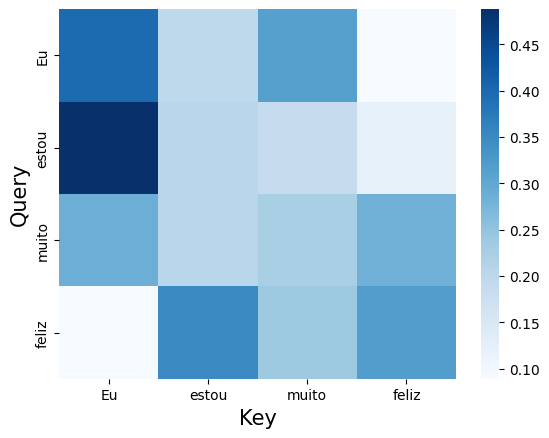

In [14]:
sns.heatmap(attention_input, xticklabels=input_sentence.split(), yticklabels=input_sentence.split(), cmap="Blues") 
plt.ylabel('Query', fontsize = 15) 
plt.xlabel('Key', fontsize = 15) 
plt.show()

## Decoder Self-Attention

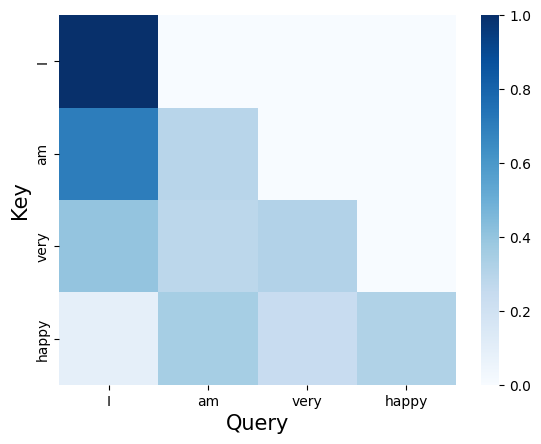

In [15]:
sns.heatmap(attention_output, xticklabels=output_sentence.split(), yticklabels=output_sentence.split(), cmap="Blues") 
plt.ylabel('Key', fontsize = 15) 
plt.xlabel('Query', fontsize = 15) 
plt.show()

## Encoder-Decoder Attention

In [16]:
attention_inp_out

array([[0.28080198, 0.3166223 , 0.22625997, 0.17631574],
       [0.26284798, 0.28518612, 0.22967078, 0.22229512],
       [0.26658834, 0.24439295, 0.23417792, 0.25484079],
       [0.22395816, 0.20286802, 0.24939458, 0.32377924]])

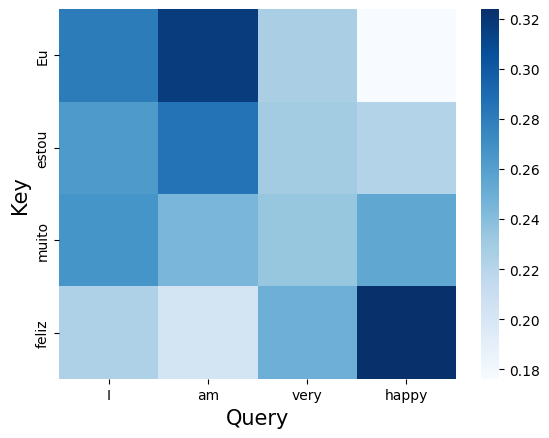

In [17]:
sns.heatmap(attention_inp_out, xticklabels=output_sentence.split(), yticklabels=input_sentence.split(), cmap="Blues") 
plt.ylabel('Key', fontsize = 15) 
plt.xlabel('Query', fontsize = 15) 
plt.show()

Referência:
- https://github.com/ajhalthor